In [35]:
# from google.colab import drive

In [36]:
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_excel("dataset/data karbon diokasida.xlsx")

In [4]:
data.head(10)

,Year,Month,decimal_date,monthly_average,de-season_alized,days,st.dev_of_days,unc_of_mon_mean
0,1958,3,1958.2027,315.70,314.43,-1,-9.99,-0.99
1,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99
2,1958,5,1958.3699,317.51,314.71,-1,-9.99,-0.99
3,1958,6,1958.4548,317.24,315.14,-1,-9.99,-0.99
4,1958,7,1958.5370,315.86,315.18,-1,-9.99,-0.99
5,1958,8,1958.6219,314.93,316.18,-1,-9.99,-0.99
6,1958,9,1958.7068,313.20,316.08,-1,-9.99,-0.99
7,1958,10,1958.7890,312.43,315.41,-1,-9.99,-0.99
8,1958,11,1958.8740,313.33,315.20,-1,-9.99,-0.99
9,1958,12,1958.9562,314.67,315.43,-1,-9.99,-0.99


## 1. statistika deskriptif

In [5]:
data.describe()

,Year,Month,decimal_date,monthly_average,de-season_alized,days,st.dev_of_days,unc_of_mon_mean
count,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000
mean,1990.458704,6.495553,1990.957709,358.467510,358.459479,19.006353,-2.112605,-0.100521
std,18.946403,3.444348,18.945122,31.175522,31.110256,12.033190,4.542438,0.513548
min,1958.000000,1.000000,1958.202700,312.430000,314.430000,-1.000000,-9.990000,-0.990000
25%,1974.000000,4.000000,1974.583350,330.115000,330.470000,8.500000,0.155000,0.060000
50%,1990.000000,6.000000,1990.958300,354.420000,355.110000,25.000000,0.390000,0.150000
75%,2007.000000,9.000000,2007.333350,383.765000,383.755000,28.000000,0.560000,0.210000
max,2023.000000,12.000000,2023.708300,424.000000,422.020000,31.000000,1.310000,0.580000


Tabel diatas berisi data statistik yang terkait dengan beberapa variabel atau atribut. Di bawah ini adalah deskripsi dari setiap kolom data dalam tabel:

Year (Tahun): Rata-rata tahun dalam data adalah sekitar 1990.46, dengan rentang tahun dari 1958 hingga 2023. Nilai minimum adalah 1958, dan nilai maksimum adalah 2023.

Month (Bulan): Rata-rata bulan dalam data adalah sekitar 6.50, yang menunjukkan kecenderungan data ini terdistribusi sepanjang tahun. Rentang bulan adalah dari 1 hingga 12.

Decimal Date (Tanggal Desimal): Rata-rata tanggal desimal dalam data adalah sekitar 1990.96.

Monthly Average (Rata-rata Bulanan): Rata-rata dari data ini adalah sekitar 358.47. Data ini mungkin merujuk pada suatu nilai rata-rata yang dicatat setiap bulan.

De-seasonalized (Diseasonalized): Rata-rata data ini adalah sekitar 358.46. Ini mungkin merupakan data yang telah dibersihkan atau dikoreksi dari efek musiman atau tren.

Days (Hari): Rata-rata jumlah hari dalam data ini adalah sekitar 19.00, dengan nilai minimum 1 dan nilai maksimum 31. Ini mungkin merujuk pada jumlah hari dalam satu bulan.

St. Dev. of Days (Deviasi Standar dari Hari): Standar deviasi dari data hari adalah sekitar 12.03. Ini mengukur sejauh mana data hari berbeda dari rata-rata.

Unc. of Mon. Mean (Ketidakpastian Rata-rata Bulanan): Ketidakpastian rata-rata bulanan adalah sekitar -2.11. Nilai negatif mungkin menunjukkan ketidakpastian dalam pengukuran.


In [6]:
mean_of_Co2 = np.mean(data["monthly_average"])
med_of_Co2 = np.median(data["monthly_average"])
std_dev_of_Co2 = np.std(data["monthly_average"])

print("Mean CO2 Level: ",mean_of_Co2)
print("Median CO2 Level: ",med_of_Co2)
print("Standar Deviasi CO2 Level: ",std_dev_of_Co2)

Mean CO2 Level:  358.4675095298603
Median CO2 Level:  354.42
Standar Deviasi CO2 Level:  31.155708713031736


## 2 analisis data eksplorasi (analisis unvariat)

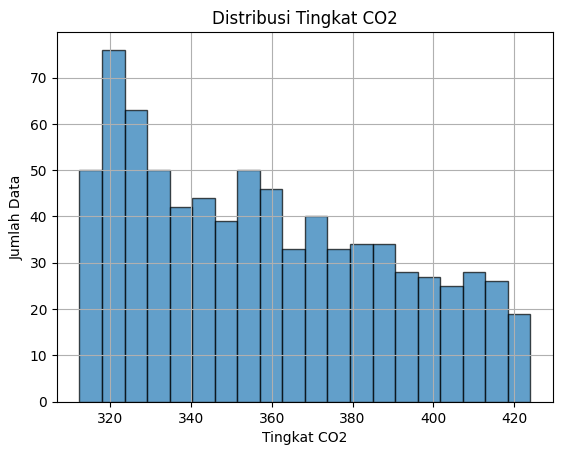

In [7]:
plt.hist(data['monthly_average'], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Tingkat CO2')
plt.ylabel('Jumlah Data')
plt.title('Distribusi Tingkat CO2')
plt.grid(True)

Setiap batang pada grafik diatas mewakili satu bulan atau tahun dan tingginya menunjukkan berapa banyak CO2 yang ada pada periode tersebut. Dapat dilihat bahwa secara keseluruhan, terdapat tren peningkatan konsentrasi CO2 dari waktu ke waktu yang menunjukkan bahwa masih banyak yang perlu dilakukan untuk mengurangi emisi dan melindungi lingkungan kita untuk generasi mendatang.

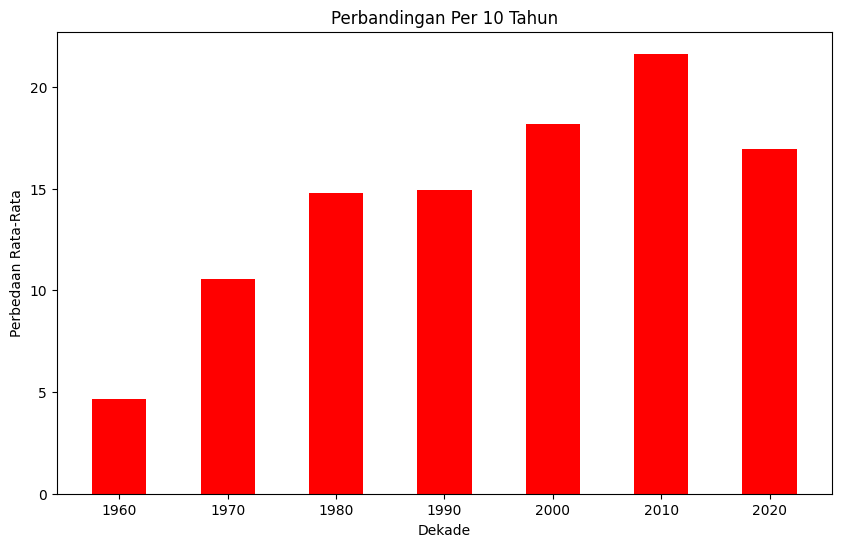

In [19]:
data['Decade'] = (data['Year'] // 10) * 10

# Menghitung perbedaan rata-rata dalam setiap dekade
decade_means = data.groupby('Decade')['monthly_average'].mean()
decade_means = decade_means.diff()

# Membuat bar plot
plt.figure(figsize=(10, 6))
plt.bar(decade_means.index, decade_means.values, color='r', width=5)
plt.xlabel('Dekade')
plt.ylabel('Perbedaan Rata-Rata')
plt.title('Perbandingan Per 10 Tahun')
plt.show()

terdapat kenaikan yang cukup signifikan dari tahun 1960 hingga 2010 dengan mencapai lebih dari 20 poin distribusi sehingga pada tahun 2010 merupakan tahun yang mencapai perolehan rata-rata lebih dari 20 poin. akan tetapi pada tahun 2020 mengalami penurunan antar 15 - 20 poin. hal ini merupakan hal yang baik karena penurunan CO2 dapat memberikan dampak yang baik bagi lingkungan.

In [25]:
data['Decade'].value_counts()

1960    120
1970    120
1980    120
1990    120
2000    120
2010    120
2020     45
1950     22
Name: Decade, dtype: int64

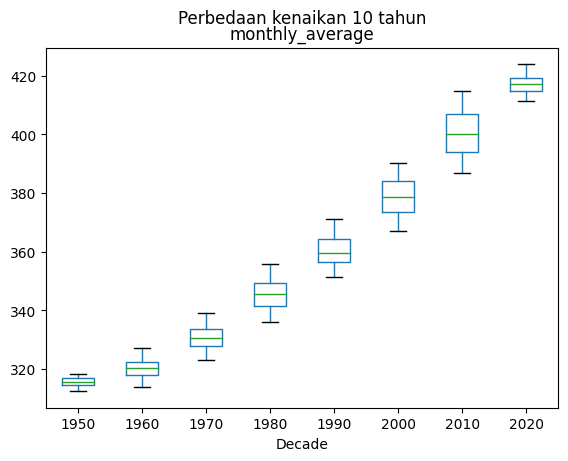

In [21]:
# Membuat boxplot
data.boxplot(column="monthly_average", by="Decade", grid=False)
plt.suptitle("Perbedaan kenaikan 10 tahun")  # Menghapus judul default

plt.show()

In [14]:
import seaborn as sns

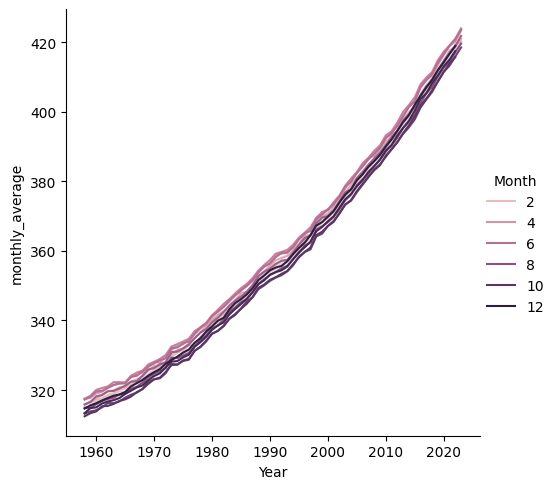

In [15]:
sns.relplot(data=data, x="Year", y="monthly_average", hue="Month", kind="line")

## 3. analisis data eksplorasi (analisis bivariat)

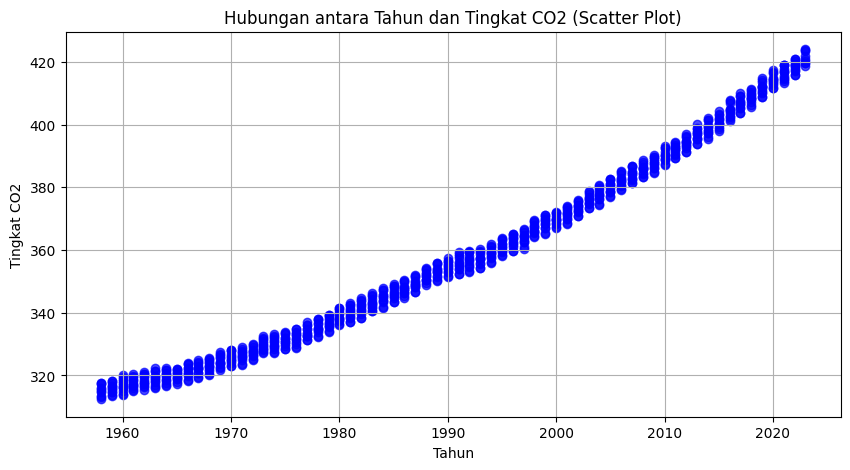

In [43]:
plt.figure(figsize=(10, 5))
plt.scatter(data['Year'], data['monthly_average'], color='b', marker='o', alpha=0.7)
plt.xlabel('Tahun')
plt.ylabel('Tingkat CO2')
plt.title('Hubungan antara Tahun dan Tingkat CO2 (Scatter Plot)')
plt.grid(True)

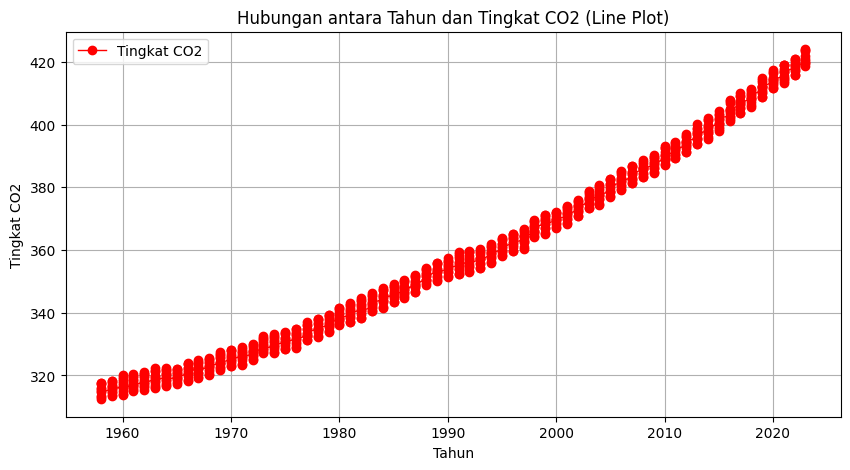

In [44]:
plt.figure(figsize=(10, 5))
plt.plot(data['Year'], data['monthly_average'], color='r', marker='o', linestyle='-', markersize=6, linewidth=1, label='Tingkat CO2')
plt.xlabel('Tahun')
plt.ylabel('Tingkat CO2')
plt.title('Hubungan antara Tahun dan Tingkat CO2 (Line Plot)')
plt.legend()
plt.grid(True)

berdasarkan grafik di atas, tingkat Co2 mengalami peningkatan setiap tahun

In [45]:
correlation_matrix = data.corr()

<Figure size 600x400 with 0 Axes>

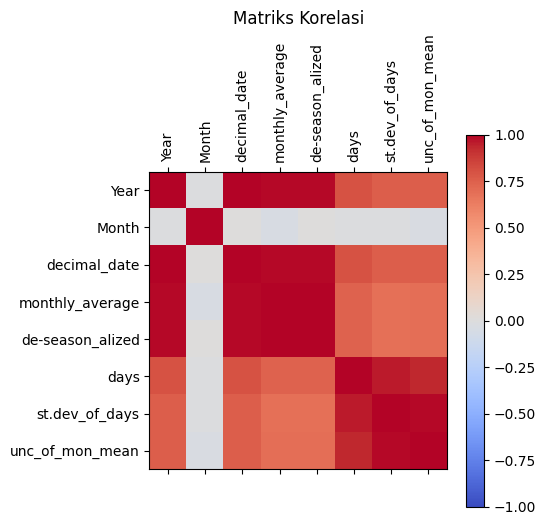

In [46]:
plt.figure(figsize=(6, 4))
plt.matshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar()
plt.title('Matriks Korelasi')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()

matriks diatas merupakan korelasi antar variabel, jika antar variabel mendapatkan nilai korelasi yang tinggi di atas 0.00 maka warna dari korelasi tersebut akan semakin terang menuju warna merah yang berarti menandakan bahwa korelasi antar variabel sangatlah kuat. sebalikanya jika nilai korelasi mendapatkan nilai rendah di bawah 0.00 maka warna yang ditunjukkan akan berwarna putih menuju warna biru yang berarti korelasi antar variabel tidak kuat atau mungkin tidak ada kaitan nya.

## 4. supervised learning dengan Simple Linear Regression

In [47]:
from scipy import stats
from sklearn.linear_model import LinearRegression
slope, intercept, r_value, p_value, std_err = stats.linregress(data['Year'], data['monthly_average'])

In [48]:
print("Koefisien Regresi (Slope):", slope)
print("Intersep (Intercept):", intercept)
print("Koefisien Korelasi (R-squared):", r_value**2)

Koefisien Regresi (Slope): 1.6268766830499142
Intersep (Intercept): -2879.763344482266
Koefisien Korelasi (R-squared): 0.9775417892132348


In [49]:
# model linear regression
model = LinearRegression()

In [50]:
# fitur seleksi, seleksi fitur yang memiliki kaitan nya dengan iklim
# seperti pada data yang ditunjukkan bahwa terdapat 2 fitur yang memiliki kaitannya dengan iklim
# fitur monthly_average dan de-seasonalized memiliki hubungan terkait iklim
years = np.array(data['Year'])
co2_level = np.array(data['monthly_average'])
years = years.reshape(-1,1)

In [51]:
model.fit(years, co2_level)

LinearRegression()

In [52]:
predicted_co2_2024 = model.predict(np.array([[2024]]).reshape(1, -1))

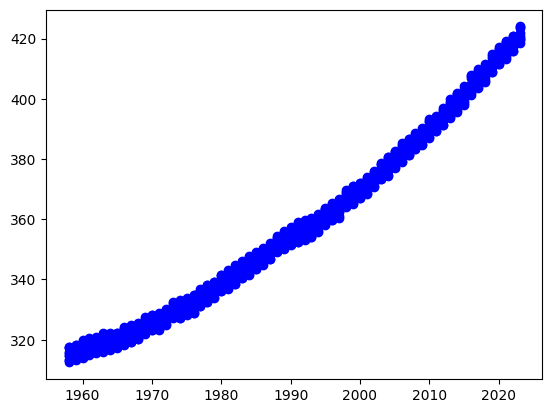

In [53]:
plt.scatter(years, co2_level, color='b', marker='o', label='Data Asli')

hubungan fitur year dengan level co2 yang meningkat seiring bertambahnya tahun. dengan kenaikan yang hingga 100 ppm dengan jarak tahun antara 1960 - 2023

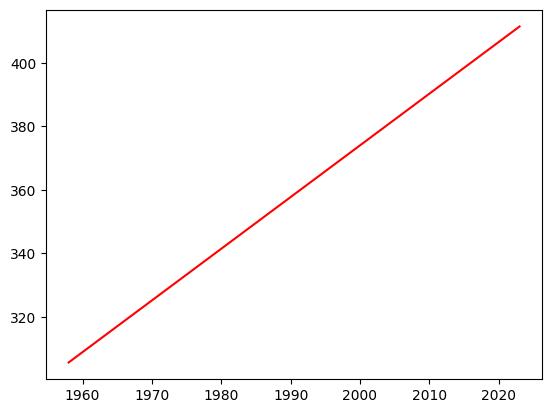

In [54]:
plt.plot(years, model.predict(years), color='r', label='Regresi Linear')

prediksi peningkatan level co2 dengan regresi linear

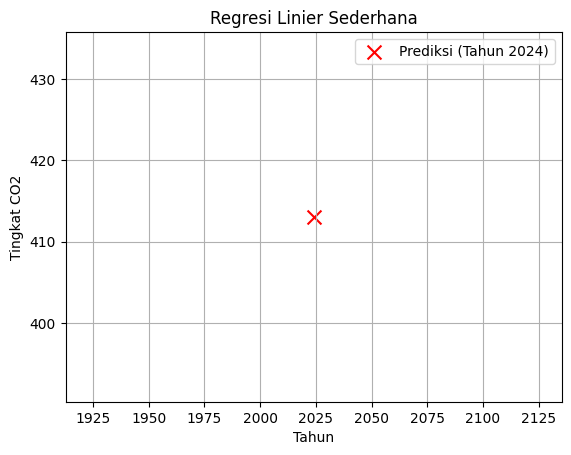

In [64]:
plt.scatter([2024], predicted_co2_2024, color='r', marker='x', s=100, label='Prediksi (Tahun 2024)')
plt.xlabel('Tahun')
plt.ylabel('Tingkat CO2')
plt.title('Regresi Linier Sederhana')
plt.legend()
plt.grid(True)

plt.show()

In [56]:
print(f"Prediksi Tingkat CO2 untuk Tahun 2024: {predicted_co2_2024[0]:.2f}")

Prediksi Tingkat CO2 untuk Tahun 2024: 413.04


## 5 unsupervised learning (K-Means)

In [57]:
from sklearn.cluster import KMeans

In [58]:
years = data["Year"]
features = data[["monthly_average","de-season_alized"]]

In [59]:
n_clusters = 3
kmeans = KMeans(n_clusters = n_clusters)
kmeans.fit(features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [60]:
data["cluster"] = kmeans.labels_

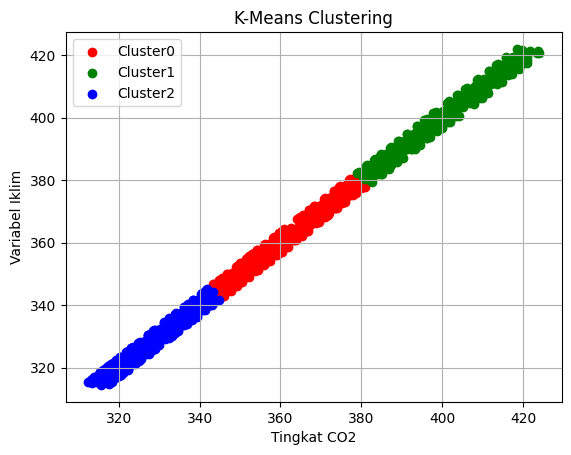

In [61]:
colors = ['r', 'g', 'b', 'c', 'm', 'y']
for i in range(n_clusters):
  cluster_data = data[data["cluster"]==i]
  plt.scatter(cluster_data["monthly_average"], cluster_data["de-season_alized"], c = colors[i], label = f'Cluster{i}')

plt.xlabel('Tingkat CO2')
plt.ylabel('Variabel Iklim')
plt.title('K-Means Clustering')
plt.legend()
plt.grid(True)

plt.show()

In [62]:
for i in range(n_clusters):
    cluster_data = data[data['cluster'] == i]
    print(f"Data dalam Cluster {i}:\n")
    print(cluster_data)
    print("\n")

Data dalam Cluster 0:

     Year  Month  decimal_date  monthly_average  de-season_alized  days  \
301  1983      4     1983.2917           345.39            342.76    23   
302  1983      5     1983.3750           346.14            342.97    28   
303  1983      6     1983.4583           345.76            343.30    20   
304  1983      7     1983.5417           344.32            343.56    22   
310  1984      1     1984.0417           344.21            344.32    23   
..    ...    ...           ...              ...               ...   ...   
564  2005      3     2005.2083           380.95            379.45    26   
569  2005      8     2005.6250           378.93            380.61    26   
570  2005      9     2005.7083           376.89            380.20    27   
571  2005     10     2005.7917           377.18            380.49    14   
572  2005     11     2005.8750           378.54            380.69    23   

     st.dev_of_days  unc_of_mon_mean  cluster  
301            0.29         